In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\danny\anaconda3\envs\Python_Course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
## Skill count per month for data analysts
df_DA_IL = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Israel')].copy()

df_DA_IL['job_posted_month_no'] = df_DA_IL['job_posted_date'].dt.month

# Explode job_skills column
df_DA_IL_explode = df_DA_IL.explode('job_skills')

In [3]:
# Group by month and job_skills
df_DA_IL_pivot = df_DA_IL_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)
df_DA_IL_pivot

job_skills,airflow,aws,azure,bash,bigquery,bitbucket,c,c#,c++,crystal,...,spreadsheet,spss,sql,sql server,ssrs,tableau,tensorflow,unity,vba,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,2,6,1,0,5,0,0,1,0,0,...,0,0,39,2,0,13,0,0,0,0
2,2,5,0,0,3,0,0,0,0,2,...,0,0,19,0,0,14,1,0,0,0
3,0,1,0,0,4,0,0,0,0,0,...,0,0,30,0,0,14,0,0,1,0
4,0,1,0,0,1,0,2,0,0,0,...,0,0,11,1,0,3,1,1,0,0
5,1,1,0,0,1,0,1,0,0,0,...,0,0,20,0,0,10,0,0,0,0
6,1,1,0,0,0,0,0,0,0,0,...,1,0,24,1,0,8,0,0,0,0
7,1,0,0,0,1,0,0,0,2,0,...,0,1,25,0,1,4,0,0,0,0
8,2,1,0,1,2,0,0,0,0,0,...,0,0,19,0,1,4,0,1,0,0
9,0,0,0,0,1,1,0,0,0,0,...,1,0,16,1,0,6,0,0,0,0


In [4]:
# sorts by count
df_DA_IL_pivot.loc['Total'] = df_DA_IL_pivot.sum()
df_DA_IL_pivot = df_DA_IL_pivot[df_DA_IL_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_IL_pivot = df_DA_IL_pivot.drop('Total')
df_DA_IL_pivot

job_skills,sql,python,tableau,excel,power bi,r,looker,pandas,bigquery,aws,...,azure,vba,seaborn,spss,bitbucket,c#,dax,matlab,plotly,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,39,25,13,5,8,3,6,2,5,6,...,1,0,0,0,0,1,0,0,0,0
2,19,15,14,4,4,0,3,6,3,5,...,0,0,0,0,0,0,0,0,0,0
3,30,18,14,9,4,6,2,4,4,1,...,0,1,0,0,0,0,0,0,0,0
4,11,8,3,2,3,4,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,20,14,10,5,7,0,2,2,1,1,...,0,0,0,0,0,0,1,0,0,0
6,24,18,8,2,3,6,3,3,0,1,...,0,0,0,0,0,0,0,0,0,0
7,25,17,4,3,2,5,3,0,1,0,...,0,0,0,1,0,0,0,1,0,0
8,19,13,4,3,4,6,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
9,16,8,6,3,3,1,3,3,1,0,...,0,0,1,0,1,0,0,0,1,0


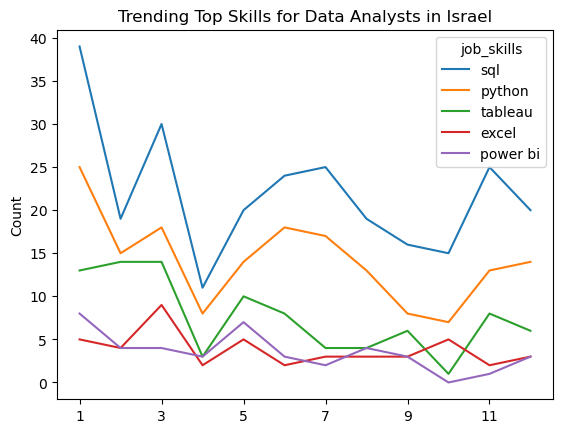

In [5]:
df_DA_IL_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in Israel')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [6]:
# Get monthly totals
DA_totals = df_DA_IL.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     45
2     24
3     40
4     18
5     32
6     29
7     29
8     22
9     22
10    16
11    32
12    26
dtype: int64

In [7]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_IL_percent = df_DA_IL_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_IL_percent = df_DA_IL_percent.reset_index()
df_DA_IL_percent['job_posted_month'] = df_DA_IL_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_IL_percent = df_DA_IL_percent.set_index('job_posted_month')
df_DA_IL_percent = df_DA_IL_percent.drop(columns='job_posted_month_no')

df_DA_IL_percent

job_skills,sql,python,tableau,excel,power bi,r,looker,pandas,bigquery,aws,...,azure,vba,seaborn,spss,bitbucket,c#,dax,matlab,plotly,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,86.666667,55.555556,28.888889,11.111111,17.777778,6.666667,13.333333,4.444444,11.111111,13.333333,...,2.222222,0.0,0.000000,0.000000,0.000000,2.222222,0.000,0.000000,0.000000,0.000000
Feb,79.166667,62.500000,58.333333,16.666667,16.666667,0.000000,12.500000,25.000000,12.500000,20.833333,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
Mar,75.000000,45.000000,35.000000,22.500000,10.000000,15.000000,5.000000,10.000000,10.000000,2.500000,...,0.000000,2.5,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
Apr,61.111111,44.444444,16.666667,11.111111,16.666667,22.222222,11.111111,5.555556,5.555556,5.555556,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
May,62.500000,43.750000,31.250000,15.625000,21.875000,0.000000,6.250000,6.250000,3.125000,3.125000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.125,0.000000,0.000000,0.000000
Jun,82.758621,62.068966,27.586207,6.896552,10.344828,20.689655,10.344828,10.344828,0.000000,3.448276,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
Jul,86.206897,58.620690,13.793103,10.344828,6.896552,17.241379,10.344828,0.000000,3.448276,0.000000,...,0.000000,0.0,0.000000,3.448276,0.000000,0.000000,0.000,3.448276,0.000000,0.000000
Aug,86.363636,59.090909,18.181818,13.636364,18.181818,27.272727,9.090909,9.090909,9.090909,4.545455,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
Sep,72.727273,36.363636,27.272727,13.636364,13.636364,4.545455,13.636364,13.636364,4.545455,0.000000,...,0.000000,0.0,4.545455,0.000000,4.545455,0.000000,0.000,0.000000,4.545455,0.000000


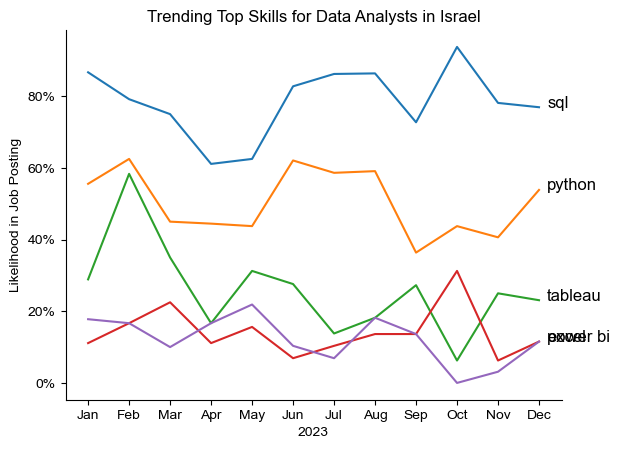

In [8]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_IL_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in Israel')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()